In [1]:
import numpy as np
import matplotlib.pyplot as plt

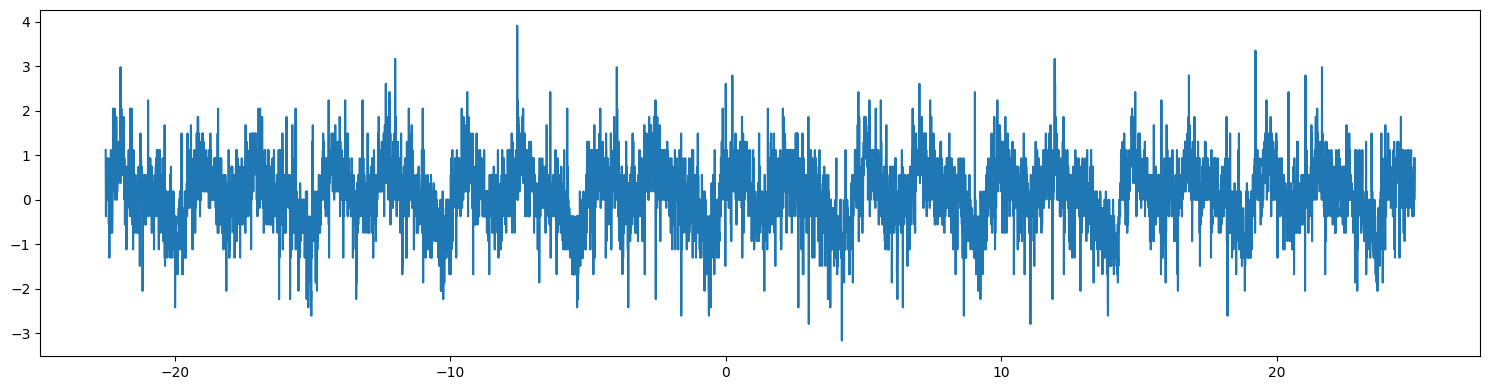

In [111]:
def readAudio(path):
    values = np.genfromtxt(fname=path,dtype=str, skip_header=503)
    valueList=[]
    for yStrings in values:
        Values=yStrings.replace(",",".").split(";")
        valueList.append(Values)
    return np.array(valueList)
x=readAudio(path="./Files/MH1.csv")
x=x.astype(float)
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
plt.plot(x[:,0],x[:,1],label="Mundharmonika")


Teil 2

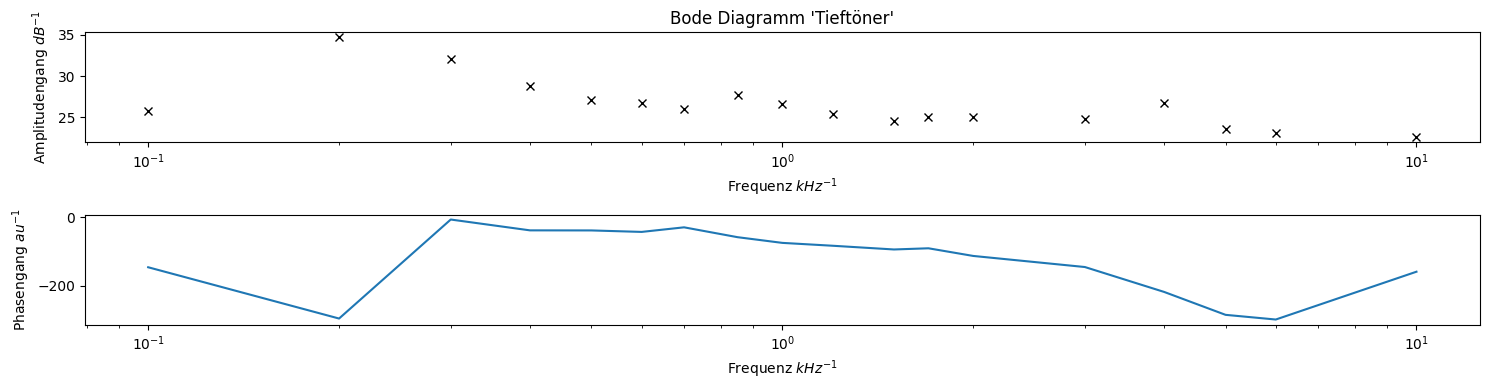

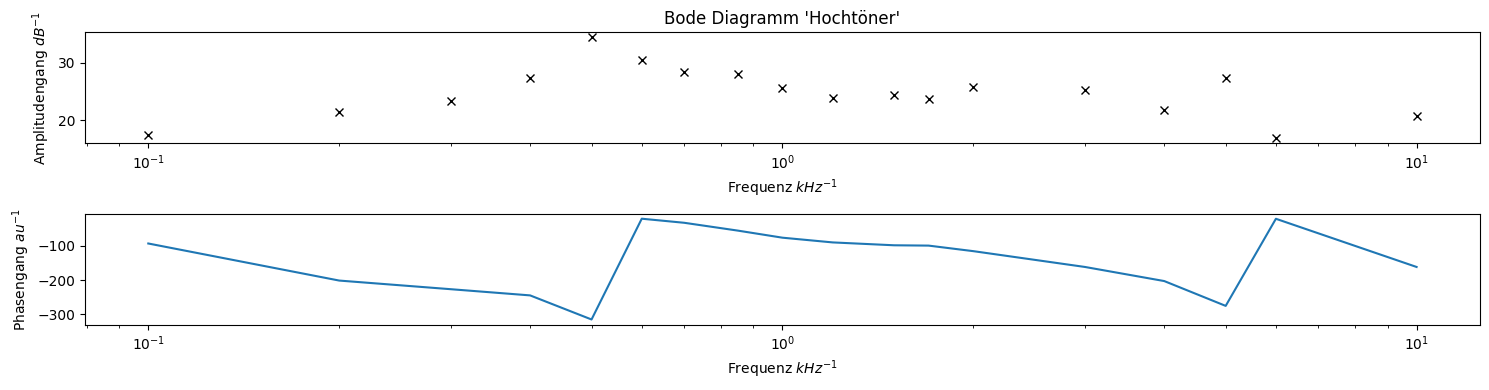

In [188]:
# kHz
freqs = [.1, .2, .3, .4, .5, .6, .7, .85, 1, 1.2, 1.5, 1.7, 2, 3, 4, 5, 6, 10]

def read_csv(path:str, col:int, start:int, stop:int):
    values = np.genfromtxt(fname=path,dtype=str, delimiter=";", usecols=(col), skip_header=start-1, max_rows=stop-start)
    valueList=[]
    for yStrings in values:
        if yStrings.endswith('s'):
            yStrings = yStrings[:-2]
        Values=yStrings.replace(",",".").split(";")
        valueList.append(Values)
    return np.array(valueList, dtype= float)

# takes time-deltas, returns phaseshifts
def delta2phase(delta_arrray, freqs_array=freqs):
    phasearray = []
    for i in range(len(delta_arrray)):
        phasearray.append(-delta_arrray[i] * 360/1000 * freqs_array[i]) # adjust powers of ten
    return phasearray

# check if phaseshift (adjustet to s) is smaller than 2pi (given in seconds also). If not returns False, prints Index.
def check_phases(delta_array, freqsarray=freqs)->bool:
    for i in range(2, len(delta_array)):
        if delta_array[i] / 1_000_000 > 1 / (freqsarray[i] * 1000):# adjust powers of ten
            print("Failed at Index " + str(i) + ": " + str(delta_array[i] / 1_000_000) + " , " + str(1 / (freqsarray[i]) * 1000))
            return False
    return True
# print(check_phases(delta_t))
# print(check_phases(delta_h))

# 'Tieftöner'
peak2peak_t = read_csv("./Files/teil2.csv", 2, 2, 20)
delta_t = read_csv("./Files/teil2.csv", 3, 2, 20)
# adapt ms -> µs
for i in range(0,2):
    delta_t[i] *= 1000
log_peak2peak_t = 20 * np.log10(peak2peak_t)

phases_t = delta2phase(delta_t)
# print(phases_t)

# 'Hochtöner'
peak2peak_h = read_csv("./Files/teil2.csv", 2, 22, 40)
delta_h = read_csv("./Files/teil2.csv", 3, 22, 40)
# adapt ms -> µs
for i in range(0,5):
    delta_h[i] *= 1000
log_peak2peak_h = 20 * np.log10(peak2peak_h)

phases_h = delta2phase(delta_h)


def plotter():
    pass

plt.subplot(2, 1, 1)
plt.title("Bode Diagramm \'Tieftöner\'")
plt.plot(freqs, log_peak2peak_t, 'xk')
plt.semilogx()
plt.xlabel("Frequenz $kHz^{-1}$")
plt.ylabel("Amplitudengang $dB^{-1}$")
# plt.show()
plt.subplot(2, 1, 2)
plt.semilogx(freqs, phases_t)
plt.xlabel("Frequenz $kHz^{-1}$")
plt.ylabel("Phasengang $au^{-1}$")
plt.show()

plt.subplot(2, 1, 1)
plt.title("Bode Diagramm \'Hochtöner\'")
plt.plot(freqs, log_peak2peak_h, 'xk')
plt.semilogx()
plt.xlabel("Frequenz $kHz^{-1}$")
plt.ylabel("Amplitudengang $dB^{-1}$")
# plt.show()
plt.subplot(2, 1, 2)
plt.semilogx(freqs, phases_h)
plt.xlabel("Frequenz $kHz^{-1}$")
plt.ylabel("Phasengang $au^{-1}$")
plt.show()